# Breadth First Search



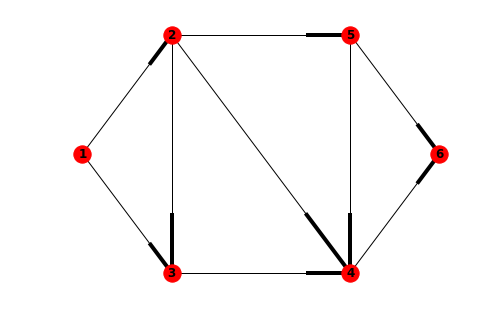

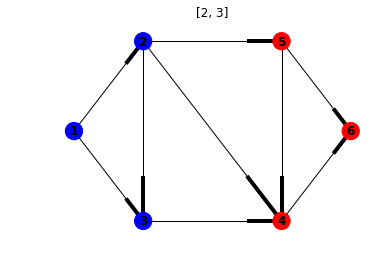

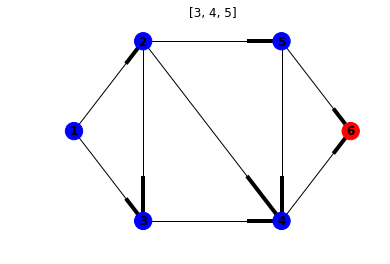

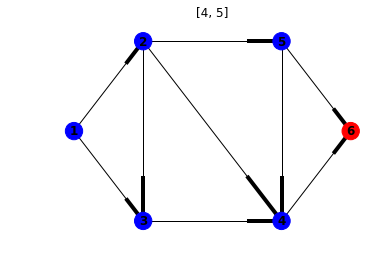

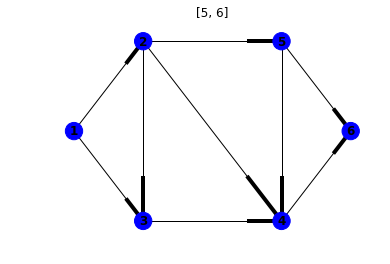

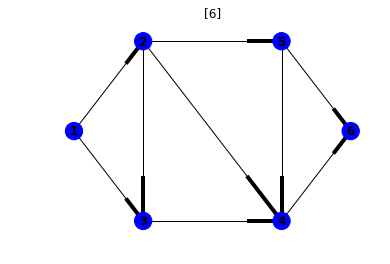

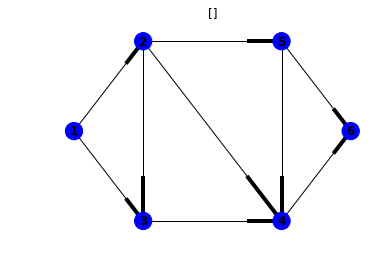

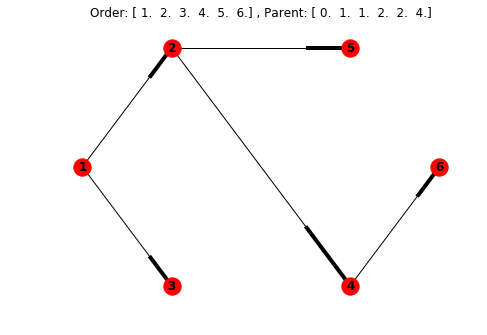

In [49]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt

def adjacency_list(FStar):
    '''
    Outarc adjacency list
    '''
    A = dict()
    N = np.sort(np.unique(FStar.reshape(-1,)))
    for i in N:
        A[i] = FStar[:,1][np.argwhere(FStar[:,0]==i)].reshape(-1,).tolist()
    return A

def bfs(FStar, s, n=None):
    '''
    Breadth First Search using Forward Star representation.
    FStar - Forward Star representation
    s - source node
    '''
    A = adjacency_list(FStar)
    # Number of nodes
    if n is None:
        n = len(A)
    # Tails of arcs
    T = FStar[:,0]
    H = FStar[:,1]
    # Heads of arcs
    LIST = list([s])
    mark = np.zeros(n)
    next_= 1
    mark[s] = 1
    parent = np.zeros(n)
    parent[s] = 0
    order = np.zeros(n)
    order[s] = next_
    while len(LIST) != 0:
        i = LIST.pop(0)
        # Unmarked j nodes of (i,j) arcs 
        jj = []
        if i in A.keys():
            if A[i] != []:
                jj = [j for j in A[i] if mark[j]==0]
                # Lexicographical ordering
                jj.sort()
            if len(jj) !=0:
                for j in jj:
                    mark[j] = 1
                    parent[j] = i
                    next_ += 1
                    order[j] = next_
                    LIST.append(j)
        # Draw the traversal steps
        G = nx.DiGraph()
        G.add_nodes_from([1,2,3,4,5,6])
        G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(4,6),(5,4),(5,6)])
        shells=[[6,5,2,1,3,4]]
        node_color = ["b" if mark[i]==1 else "r" for i in range(1,7)]
        nx.draw_networkx(G, pos=nx.shell_layout(G, shells), node_color=node_color, font_weight='bold')
        ax = plt.gca()
        plt.axis("off")
        plt.title(str(LIST))
        plt.show()
    index = np.arange(1, n+1, 1).reshape(-1,1)
  
    return order, parent
#Drawing the given graph
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(4,6),(5,4),(5,6)])
shells=[[6,5,2,1,3,4]]
nx.draw_shell(G, nlist=shells, with_labels=True, font_weight='bold')
plt.show()

FStar = np.array([[0, 0],
                    [1,2],
                    [1,3],
                    [2,3],
                    [2,4],
                    [2,5],
                    [3,4],
                    [4,6],
                    [5,4],
                    [5,6],])
#BFS
order, parent = bfs(FStar,1)
#BFS search tree
T = nx.bfs_tree(G, source=1)
nx.draw_shell(T, nlist=shells, with_labels=True, font_weight='bold')
plt.title("Order: " + str(order[1:]) + " , " + "Parent: " + str(parent[1:]))
plt.show()



## Linear Algebraic approach to Breadth First Search

<IPython.core.display.Javascript object>

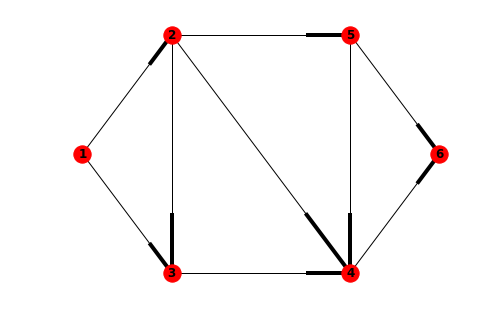

Adjacency matrix
[[0 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 1]
 [0 0 0 0 0 0]]
Adjacency matrix transpose
[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 1 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 1 1 0]]


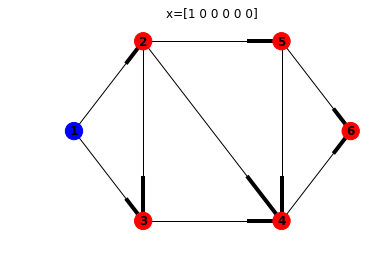

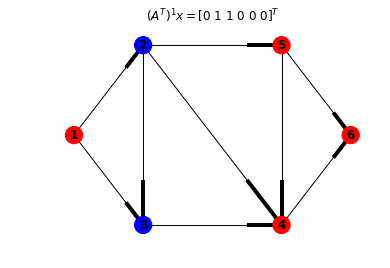

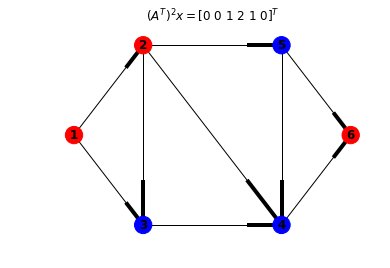

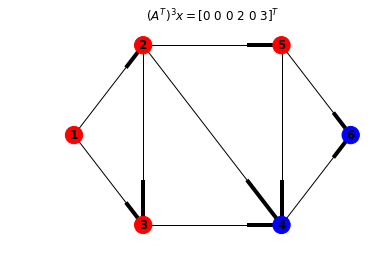

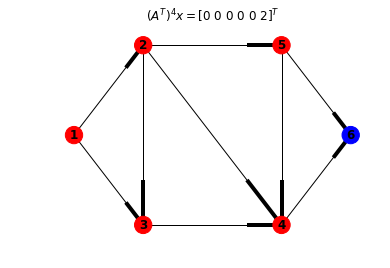

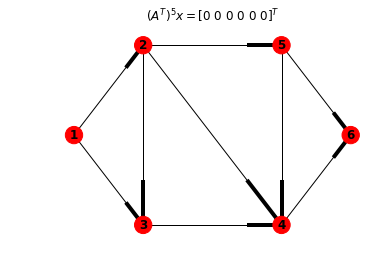

In [58]:
from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

display(Javascript(disable_js))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import bsr_matrix, csr_matrix
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(4,6),(5,4),(5,6)])
shells=[[6,5,2,1,3,4]]
nx.draw_shell(G, nlist=shells, with_labels=True, font_weight='bold')
plt.show()
A = nx.adjacency_matrix(G)
print "Adjacency matrix\n", A.toarray()
A_t = A.transpose().copy()
print "Adjacency matrix transpose\n", A_t.toarray()
x = np.zeros((6,1), dtype=int,)
x[0] = 1
t = 1
node_color = ["b" if i in x.nonzero()[0] else "r" for i in range(6)]
nx.draw_networkx(G, pos=nx.shell_layout(G, shells), node_color=node_color, font_weight='bold')
ax = plt.gca()
plt.axis("off")
plt.title('x='+ str(x.reshape(-1,)))
plt.show()
    
while True:
    y = A_t*x
    node_color = ["b" if i in y.nonzero()[0] else "r" for i in range(6)]
    nx.draw_networkx(G, pos=nx.shell_layout(G, shells), node_color=node_color, font_weight='bold')
    ax = plt.gca()
    plt.axis("off")
    plt.title(r'$(A^{T})^{%d}x=$%s$^{T}$'%(t,str(y.reshape(-1,))))
    plt.show()
    t += 1
    if np.array_equal(x,y):
        break
    elif t < A.shape[0]:
       x = y
    else:
        break

        